In [2]:
# Notes: Make sure you run the script in the same directory as your files, or add an os-based cd 

# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import kabuki
import numpy as np
import pymc
import seaborn as sns
import re
import os 

# os.chdir("Models")

# Provide a full list of files to be analysed, this should be four files 
file_list = ["m133_cyl_z_5percent_outlier_removal1",
             "m134_cyl_z_5percent_outlier_removal1",
             "m133_RDK_z_5percent_outlier_removal1", 
             "m134_RDK_z_5percent_outlier_removal1"]

# Outline what each file contains, this doubles as the legend
names = ["m133 cylinder/saccades","m134 cylinder/saccades", "m133 RDK/hand", "m134 RDK/hand"]

# Is this for monkeys or for humans? 
model_type = 'monkeys'

# Prepare the sizes of the full data structure
rows = 41 # Number of sessions (for monkeys, it should be 9 + 11 + 11 + 10)
cols = 6 # Number of DDM parameters + 1, the list is given below, normally 6

# Provide names for the columns of the data frame, including the DDM parameters
columns = ['Model', 'a', 'k', 'v intercept', 't', 'z']

# Create dataframe of all parameters 
params_df = pd.DataFrame(np.zeros([rows, cols]), columns=columns)

# Do the same for the group 
group_params = pd.DataFrame(np.zeros([4, cols]), columns=columns)
group_std = pd.DataFrame(np.zeros([4, cols]), columns=columns)

# And lastly for the traces 
traces = pd.DataFrame()

# Start a counter (convenient later for indexing), it will go from 0 to 79 
c = 0

# Iterate over all the files, this should be 4 
for j, file in enumerate(file_list):
    
    print(f"Iterating over all files, currently at step {j + 1} out of {len(file_list)}")
    
    # Load the model 
    model = hddm.load(file)
    
    # Generate the statistics for each parameter
    stats = model.gen_stats()
    
    # Get the trace, this is the value for each parameter at each time point which wasn't burned
    trace = model.get_group_traces()
    
    # Add task name to the traces data frame into the last column. 
    name = names[j]
    trace['Model'] = names[j]
    
    # Put all the traces together 
    # It's important to set the flag to ignore index to True, lest we have quadrupled indices...
    traces = pd.concat([traces, trace], ignore_index=True)
    
    if file == "m133_cyl_z_5percent_outlier_removal1":
        sequence = list(range(1, 10))
    elif file == "m134_cyl_z_5percent_outlier_removal1":
        sequence = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    elif file == "m133_RDK_z_5percent_outlier_removal1":
        sequence = list(range(1, 12))
    elif file == "m134_RDK_z_5percent_outlier_removal1":
        sequence = list(range(1, 12))

    # Iterate over all subjects  
    for i in sequence:
        
        # Create a data frame filled with the mean value of each parameter
        params_df['a'].iloc[c] = stats.loc['a_subj.'+str(i)]['mean']
        params_df['k'].iloc[c] = stats.loc['v_stim_subj.'+str(i)]['mean']
        params_df['v intercept'].iloc[c] = stats.loc['v_Intercept_subj.'+str(i)]['mean']
        params_df['t'].iloc[c] = stats.loc['t_subj.'+str(i)]['mean']
        params_df['z'].iloc[c] = stats.loc['z_subj.'+str(i)]['mean']
        params_df['Model'].iloc[c] = names[j]
        
        # Update counter
        c += 1
    
print("Extracted all important data! Moving on...")

# Correct and relabel the traces dataframe
traces['z_trans'] = pymc.invlogit(traces['z_trans']) # apply logistic function 
traces.rename(columns={'z_trans':'z', 'v_stim':'k', 'v_Intercept':'v intercept', 'z_trans':'z'}, inplace=True)

Iterating over all files, currently at step 1 out of 4


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Iterating over all files, currently at step 2 out of 4


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Iterating over all files, currently at step 3 out of 4


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Iterating over all files, currently at step 4 out of 4
Extracted all important data! Moving on...


/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
params_df = params_df.rename(columns={
    'a': 'Boundary separation \n $\it{a}$',
    'k': 'Drift constant \n $\it{k}$',
    'v intercept': 'Drift rate intercept \n $\it{v_{0}}$',
    't': 'Non-decision time \n $\it{t}$',
    'z': 'Bias \n $\it{z}$'
})

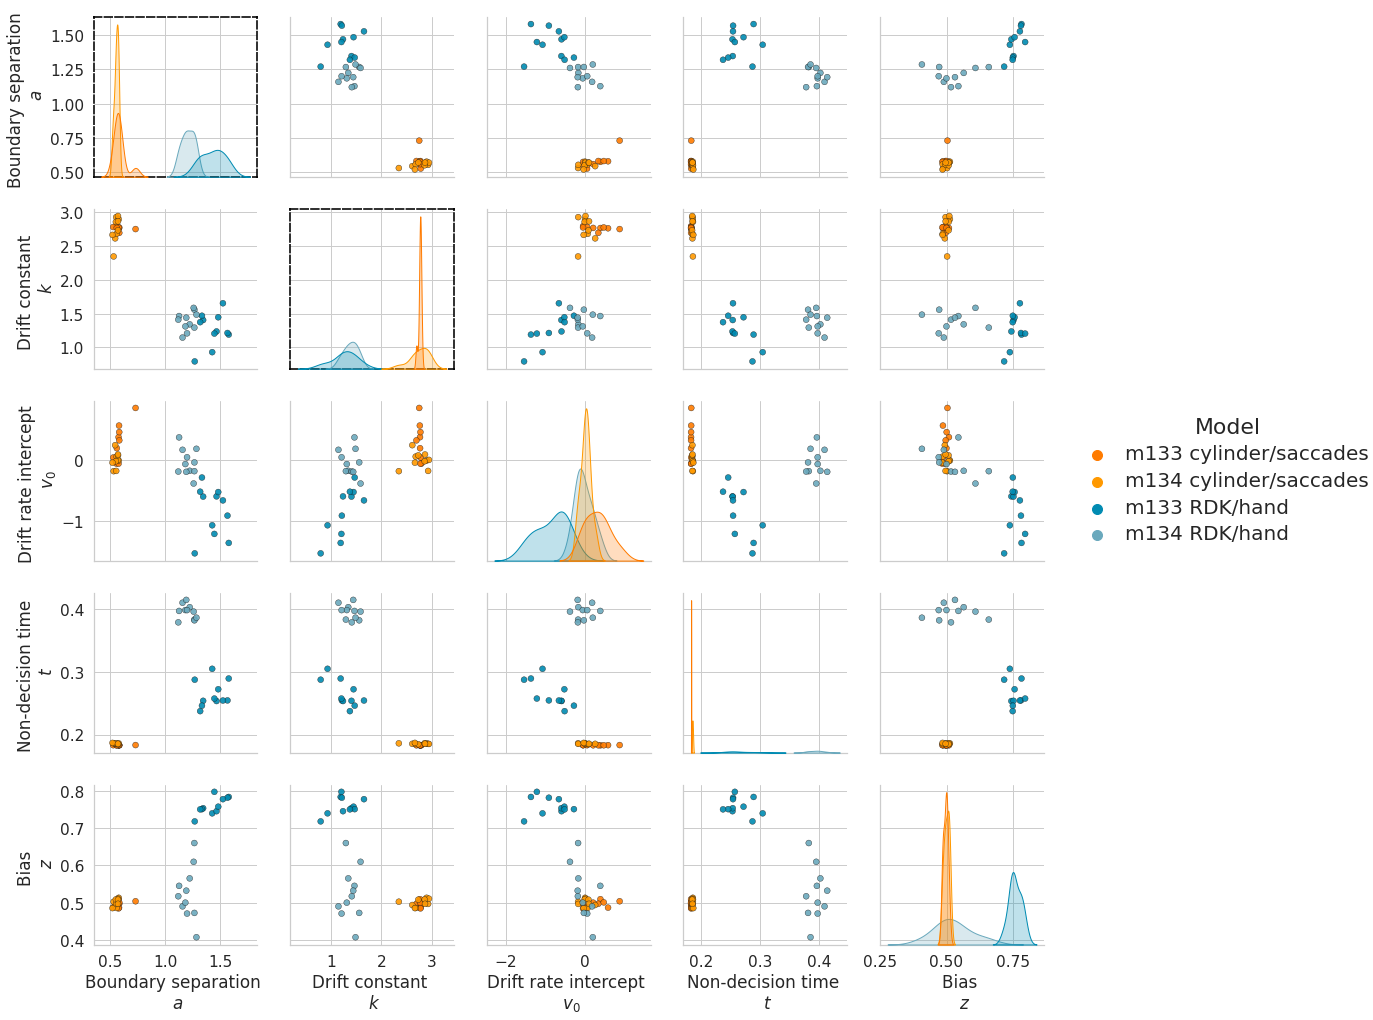

In [6]:
colors = ["#ff7b00", "#ff9900", "#008bb2", "#6aa9bd"]

sns.set(font_scale=1.4, style='whitegrid')
pw_figure = sns.pairplot(params_df, hue='Model', plot_kws = {'alpha': 0.9, 's': 35, 'edgecolor': 'k', 'linewidth': 0.4}, size=3, palette=colors)
pw_figure.fig.subplots_adjust(top=0.94, hspace=.2, wspace=.2)

ax = pw_figure.axes[0, 0]
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linestyle('--')
    spine.set_linewidth(2)
    spine.set_alpha(0.8)
    
ax = pw_figure.axes[1, 1]
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linestyle('--')
    spine.set_linewidth(2)
    spine.set_alpha(0.8)
    
legend = pw_figure._legend
legend.set_title('Model', prop={'size': 22})  
for i, text in enumerate(legend.texts):
    if i == 0:
        text.set_text('m133 cylinder/saccades ')
    elif i == 1:
        text.set_text('m134 cylinder/saccades ')
    text.set_size(20)


legend.set_bbox_to_anchor((1.05, 0.5))  # Adjust the values as needed to place the legend where you want

# Increase the size of the colored markers in the legend
for handle in legend.legendHandles:
    handle._sizes = [100]  # Adjust the size (in points) as needed
    
pw_figure.savefig('Pairwise_KDE_monkeys.pdf', bbox_inches='tight')
plt.show()